## Import Relevant Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn 
seaborn.set()

## Load the Data

In [2]:
data = pd.read_csv('datasets/Multiple-Linear-Regression.csv') # College gpa & SAT 

In [3]:
data

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [4]:
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


## Create Multiple Linear Regression Model

In [5]:
y = data['GPA']
x1 = data[['SAT','Rand 1,2,3' ]]

In [6]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           6.58e-10
Time:                        10:12:29   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Analysis

- our new variable: Rand 1,2,3 has a high p-value so we fail to reject the null and thus lose value and obtain a higher adjusted r-squared value because of it. The variable is insignificant and should be taken away. 

## Turning Categorical Data into Numerical for Regression

In [9]:
df = pd.read_csv('datasets/Dummies.csv')

In [10]:
df.sample(5)

,SAT,GPA,Attendance
73,1934,3.60,Yes
61,1808,3.49,No
12,1735,3.08,No
63,2041,3.51,No
62,1893,3.50,Yes


In [11]:
# Map the Yes and No values with 1's and 0's
# Yes = 1 and No = 0
raw_data = df.copy()

In [12]:
raw_data['Attendance'] = raw_data['Attendance'].map({'Yes':1, 'No':0})

In [13]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [14]:
raw_data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [15]:
y = raw_data['GPA']
x1 = raw_data[['SAT','Attendance']]

In [16]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           2.19e-15
Time:                        10:14:09   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Results
- The updated model is improved from the regression model without attendance due to an improved adj. R-squared value
- Attended: GPA = .8665 + .0014*SAT
- Absent: GPA = .6439 + .0014*SAT

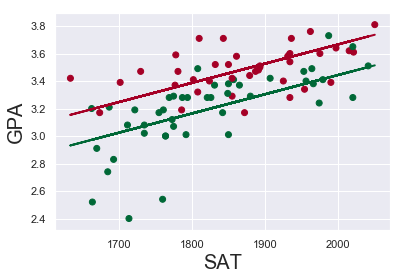

In [18]:
plt.scatter(raw_data['SAT'],y, c=raw_data['Attendance'],cmap='RdYlGn_r')
yhat_no = .6439+.0014*raw_data['SAT']
yhat_yes = .8665 + .0014*raw_data['SAT']
fig = plt.plot(raw_data['SAT'],yhat_no, lw=2, c='#006837') # green
fig = plt.plot(raw_data['SAT'],yhat_yes, lw=2, c='#a50026') # red
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

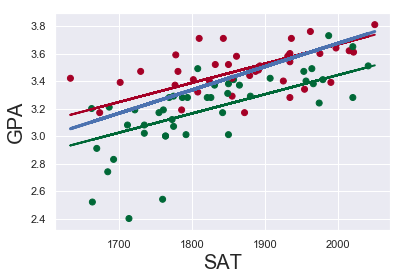

In [20]:
# Plot original regression line
plt.scatter(raw_data['SAT'],y, c=raw_data['Attendance'],cmap='RdYlGn_r')
yhat_no = .6439+.0014*raw_data['SAT']
yhat_yes = .8665 + .0014*raw_data['SAT']
yhat = .0017*raw_data['SAT'] + .275
fig = plt.plot(raw_data['SAT'],yhat_no, lw=2, c='#006837', label='regression line1') # green
fig = plt.plot(raw_data['SAT'],yhat_yes, lw=2, c='#a50026', label='regression line2') # red
fig = plt.plot(raw_data['SAT'],yhat, lw=3, c='#4C72B0', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

## How to make predictions based on linear regression model 

In [21]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [22]:
# lets create a new dataframe and organize it the same way as X
new_data = pd.DataFrame({'const':1, 'SAT':[1700,1670], 'Attendance':[0,1]})
new_data = new_data[['const', 'SAT', 'Attendance']] # rearrange columns the way I want
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [23]:
predictions= results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [24]:
predictionsdf=pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


In [ ]:
# Alice scored lower on her SAT but she attend 75% more of classes and is predicted to have higher GPA at graduation